## Exercise 

### Introduction

Climate data analysis is the most fundamental step in predicting the climate change. Its main objective is to increase understanding of the atmosphere and its interaction with the oceans, cry sphere and the land surface, through various types of approaches or techniques. They are empirical studies conducted on the climate data, diagnostic analyses and mathematical data modeling. 

At the end of the lecture “Spatial data analysis”, it has been given a practical work of on the lecture. This paper report the answere to the questions asked in the practical work. The paper is divided in 4 parts which are : introduction, exercise 1, exercise 2 and conclusion. 

The data used for processing are : fire datasets : fires.csv and the elevation datasets: bfa_elevation.  The tool used to compute is  python. For the purpose of the analysis, many modules has been downloaded and imported. The list of all modules used is the Annex part. Also the code of each question is listed in the Annex part.

### 1.1 - Import the dataset (fires.csv)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cf
import geopandas as gpd
import folium
import geopatra
import seaborn as sns
import contextily
import geoplot
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cf
import geopandas as gpd
import matplotlib.style
import matplotlib as mpl
import rasterio
mpl.style.use('default')
fire=pd.read_csv("../SpatialAnalysis2021/Data/non-spatial/fire/fire.csv")

### 1.1 - How many fires were detected in total?

In [2]:
nf=fire.shape[0]
print(f"Number of fire detected: {nf}")

Number of fire detected: 21460


### 1.2 During which time period were the fires detected?

In [3]:
fire.ACQ_DATE=pd.to_datetime(fire.ACQ_DATE)
start=fire.ACQ_DATE.min()
end=fire.ACQ_DATE.max()
print(f"The fires has been detected between {start} and {end}")

The fires has been detected between 2019-01-01 00:00:00 and 2019-01-31 00:00:00


### 1.3 Identify the ten brightest fires during this period. Where are they located?

The attribute which shows the brightness in the datasets is BRIGHTNESS.  For the computation, we sort the values in the datasets based on that attribute in order to have the ten brightest observation. The data has been sorted by descending values. 
The next table shows the ten brightest fires occurred in the period of 2019-01-01 00:00:00 and 2019-01-31 00:00:00.

In [4]:
ten_brigh = fire.sort_values(by="BRIGHTNESS", ascending=False).head(10)
ten_brigh=gpd.GeoDataFrame(ten_brigh, geometry=gpd.points_from_xy(ten_brigh.LONGITUDE, ten_brigh.LATITUDE))
ten_brigh= ten_brigh.reset_index()
ten_brigh

index  LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK   ACQ_DATE  ACQ_TIME  \
0  11427    9.6760    10.6130       422.9   1.0    1.0 2019-01-15      1244   
1   3495   10.5655     6.7566       421.8   1.0    1.0 2019-01-04      1303   
2  21228    8.1329    11.1870       419.7   1.0    1.0 2019-01-31      1244   
3   3319    7.6403     8.1262       418.0   1.0    1.0 2019-01-04      1302   
4  17854   12.4460     5.7779       413.4   1.1    1.0 2019-01-27      1006   
5   3346    7.6324     8.3984       405.4   1.0    1.0 2019-01-04      1302   
6   8828    8.6089    10.5270       399.9   1.7    1.3 2019-01-11      1308   
7  11430    9.6863    10.6208       397.0   1.0    1.0 2019-01-15      1244   
8  21012   11.3494    13.5145       396.7   1.2    1.1 2019-01-31      1244   
9  10353   10.0935     3.8743       395.2   1.5    1.2 2019-01-13      1257   

  SATELLITE INSTRUMENT  CONFIDENCE  VERSION  BRIGHT_T31    FRP DAYNIGHT  TYPE  \
0      Aqua      MODIS         100     6.03       319.8  413.7        D     0   
1      Aqua      MODIS         100     6.03       320.2  395.6        D     0   
2      Aqua      MODIS         100     6.03       322.7  381.0        D     0   
3      Aqua      MODIS         100     6.03       317.6  375.0        D     0   
4     Terra      MODIS         100     6.03       320.7  382.8        D     0   
5      Aqua      MODIS         100     6.03       314.2  287.7        D     0   
6      Aqua      MODIS         100     6.03       316.3  526.0        D     0   
7      Aqua      MODIS         100     6.03       313.1  223.3        D     0   
8      Aqua      MODIS         100     6.03       315.5  271.1        D     0   
9      Aqua      MODIS         100     6.03       318.3  380.8        D     0   

                    geometry  
0   POINT (10.61300 9.67600)  
1   POINT (6.75660 10.56550)  
2   POINT (11.18700 8.13290)  
3    POINT (8.12620 7.64030)  
4   POINT (5.77790 12.44600)  
5    POINT (8.39840 7.63240)  
6   POINT (10.52700 8.60890)  
7   POINT (10.62080 9.68630)  
8  POINT (13.51450 11.34940)  
9   POINT (3.87430 10.09350)

### 1.3 - The location of ten brightest fires during this period 2019-01-01 00:00:00 and 2019-01-31 00:00:00

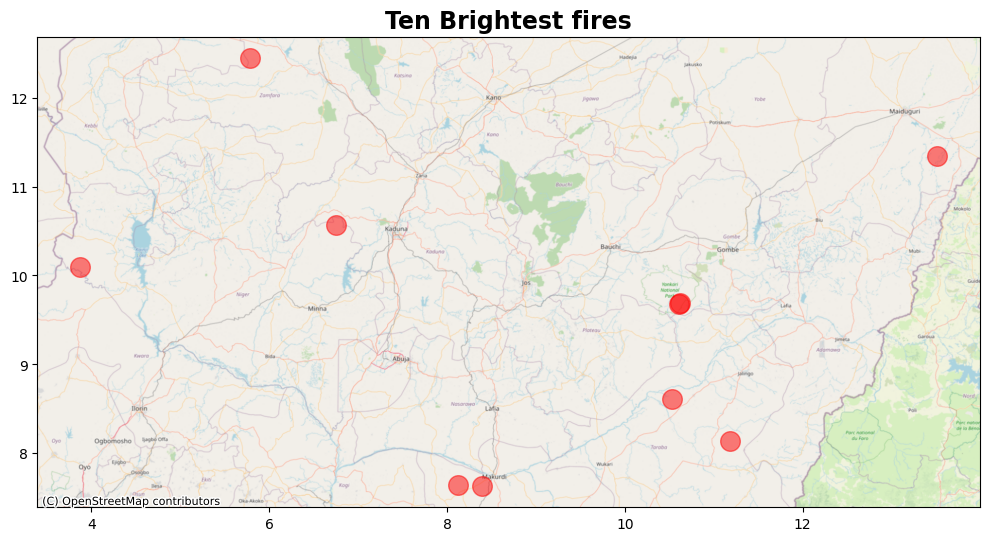

In [62]:
world=gpd.read_file( gpd.datasets.get_path("naturalearth_lowres"))
nigeria=world[world.name=="Nigeria"]
fig, ax=plt.subplots(figsize=(10,10))
plt.scatter(ten_brigh.LONGITUDE, ten_brigh.LATITUDE, s=200,c="r", alpha=0.5)
contextily.add_basemap(ax, crs=nigeria.crs,
    source=contextily.providers.OpenStreetMap.Mapnik)
ax.set_title(label="Ten Brightest fires", size=17, weight="bold")
plt.margins(0)
plt.margins(0)
plt.tight_layout() 
plt.show()

The above figure shows the ten brightest fires located in Nigeria. We can see form the graph that, the fire along the country.  Two brightest fires can see in the same location around(longitude=10 and latitude =10).

### 1.4.1. Extract all fires detected with a confidence higher than 70 percent. How much are these?

The confidence of the fire has been tracked by the attribute CONFIDENCE. The condition has been set to that attribute to select the fire with confidence higher than 70.

The number of fire with confidence higher than 70 is shown in the table above. The bold column title “CONFIDENCE” is the attribute which indicates the confidence of the fire. The first column indicating the index from the original datasets.  
In sum the number of fire with confidence higher than 70 percent is : 7285. The distribution of those fire along the space can be see in the next graph.

In [8]:
conf_70=fire[fire.CONFIDENCE>70]
conf_70_nb=conf_70.count()[0]
print(conf_70)
print(f"The numbe of fires with confidence higher than 70 percent is : {conf_70_nb}")

       LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK   ACQ_DATE  ACQ_TIME  \
5        5.5644     5.7226       307.7   2.6    1.5 2019-01-01       144   
7       12.2363    14.4138       331.5   1.2    1.1 2019-01-01       929   
8       12.2348    14.4245       326.7   1.2    1.1 2019-01-01       929   
10      12.2743    14.3043       324.3   1.2    1.1 2019-01-01       929   
11      12.2660    14.2921       367.3   1.2    1.1 2019-01-01       929   
...         ...        ...         ...   ...    ...        ...       ...   
21450   11.4083     5.7974       307.7   1.2    1.1 2019-01-31      2210   
21452   10.8918     5.7326       309.5   1.1    1.1 2019-01-31      2210   
21454   10.9928     4.8431       308.2   1.0    1.0 2019-01-31      2210   
21457   11.4788     6.7811       343.6   1.3    1.1 2019-01-31      2210   
21458   11.4804     6.7929       323.9   1.3    1.1 2019-01-31      2210   

      SATELLITE INSTRUMENT  CONFIDENCE  VERSION  BRIGHT_T31    FRP DAYNIGHT  \
5       

#### 1.4.2. The locationfires detected with a confidence higher than 70 percent

This figure shows the distribution of the fires higher than 70 percent. The fire with the confidence higher than 70 is distributed along the country Nigeria. We can see the confidence with hundred percent are not a lot. Most of the fire have the confidence from 70 to 85 percent.

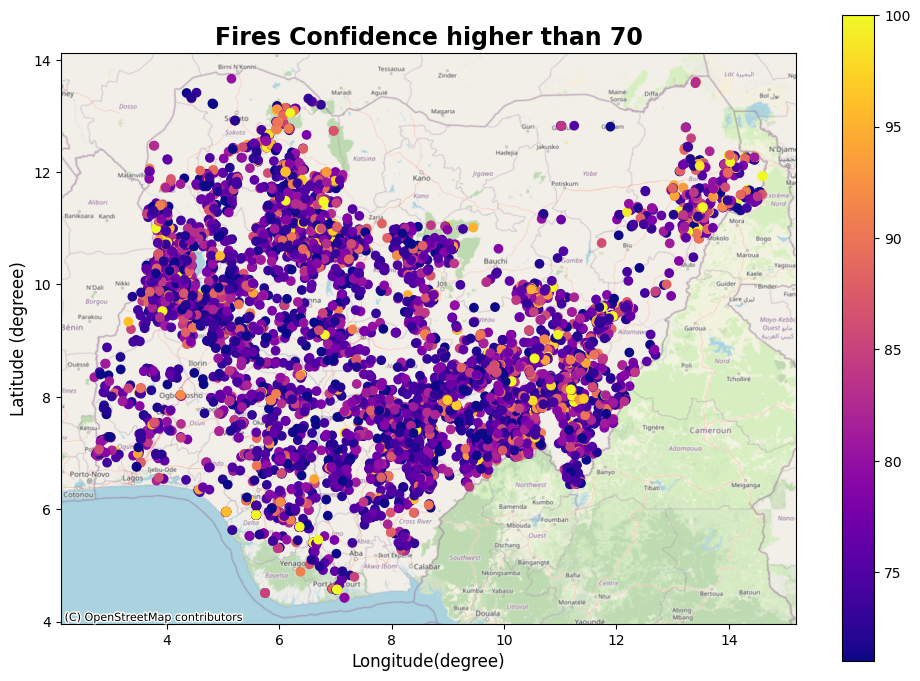

In [10]:
fig, ax=plt.subplots(figsize=(10,7))
gpd.GeoDataFrame(conf_70, geometry=gpd.points_from_xy(conf_70.LONGITUDE,conf_70.LATITUDE)).plot(column="CONFIDENCE", legend=True, cmap="plasma",ax=ax)
ax.set_xlabel(xlabel="Longitude(degree)", size=12)
ax.set_ylabel(ylabel="Latitude (degreee)",size=12 )
contextily.add_basemap(ax, crs=nigeria.crs,
    source=contextily.providers.OpenStreetMap.Mapnik)
ax.set_title(label="Fires Confidence higher than 70", size=17, weight="bold")
plt.tight_layout() 
plt.show()

### 1.5 Create a histogram showing the distribution of the fire radiative power. Cleary indicate the description of the y-axis and x-axis.

The radiative power of fire is observed through the attribute FRP of the datasets. This attribute stands for Force Radiative Power.

The number of occurrence of the Fire Radiative Power is show in the histogram above. The radiative power is in the range of 0 to 200. We can see, most of the fire has the radiative power in the range of 0 to 25.  

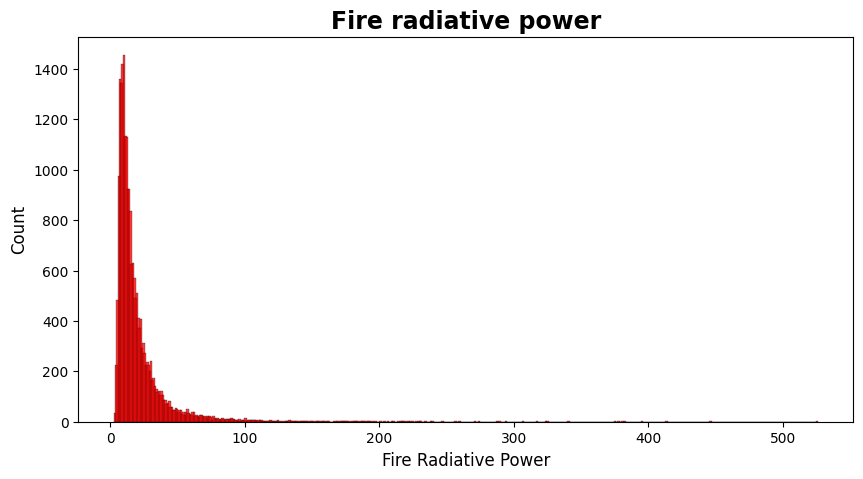

In [11]:
fig, ax=plt.subplots(figsize=(10,5))
sns.histplot(fire['FRP'],shrink=2,ax=ax, color="red")
ax.set_xlabel(xlabel="Fire Radiative Power", size=12)
ax.set_ylabel(ylabel="Count",size=12 )
ax.set_title(label="Fire radiative power", size=17, weight="bold")
plt.show()

### 1.6.1 Create a plot showing the numbers of fires for each day.

The above figure shows the occurrence of fires per day. We can from the figure, there have been more fire in 2019-01-04 specifically 1750 fires. The lowest value is show at the date  2019-01-28 specifically around 100 occurrences.

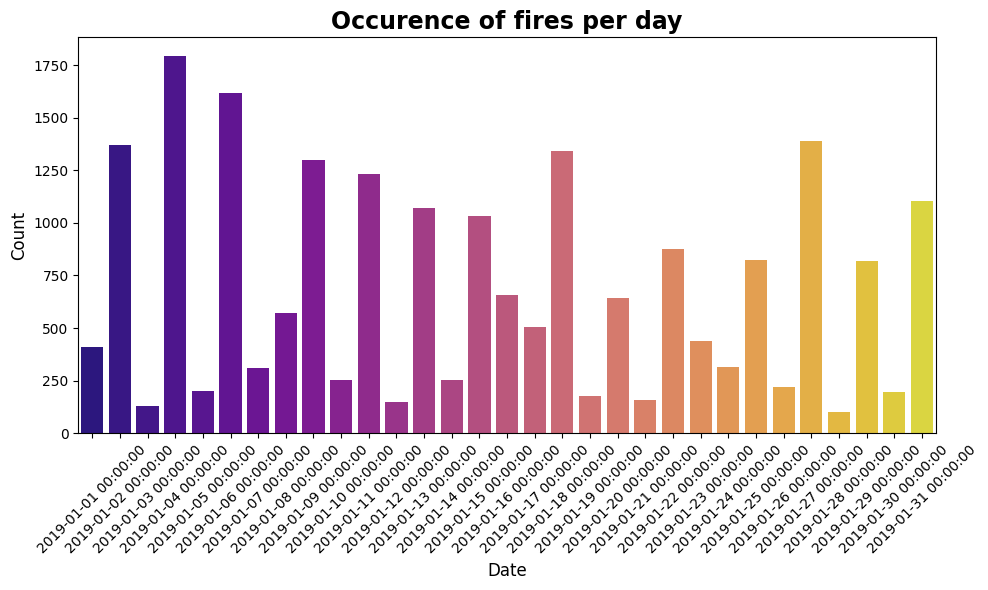

In [14]:
fire_day=fire.groupby(by=fire.ACQ_DATE).count()
plt.figure(figsize=(10,6))
ax = sns.barplot(x=fire_day.index,y=fire_day.SCAN, palette="plasma")
ax.set_xlabel(xlabel="Date", size=12)
ax.set_ylabel(ylabel="Count",size=12 )
ax.set_title(label="Occurence of fires per day", size=17, weight="bold")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.savefig("Number of fire per day",bbox_inches="tight", format="svg")
plt.show()

#### 1.6.2. Convert the dataset into a spatial geopandas dataframe.

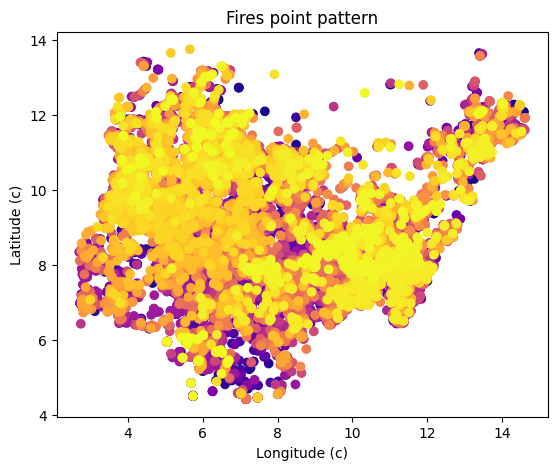

In [25]:
fire_geo=gpd.GeoDataFrame(fire, geometry=gpd.points_from_xy(fire.LONGITUDE, fire.LATITUDE))
fig, ax=plt.subplots(figsize=(15,5))
fire_geo.plot(ax=ax, cmap="plasma")
ax.set(title="Fires point pattern", xlabel='Longitude (c)', ylabel='Latitude (c)')
plt.show()

### 1. 7 Create a heat map showing the density of fires in Nigeria.

The density of fire is shown in the above figure. There four big block of fire in south east and north west of the country.

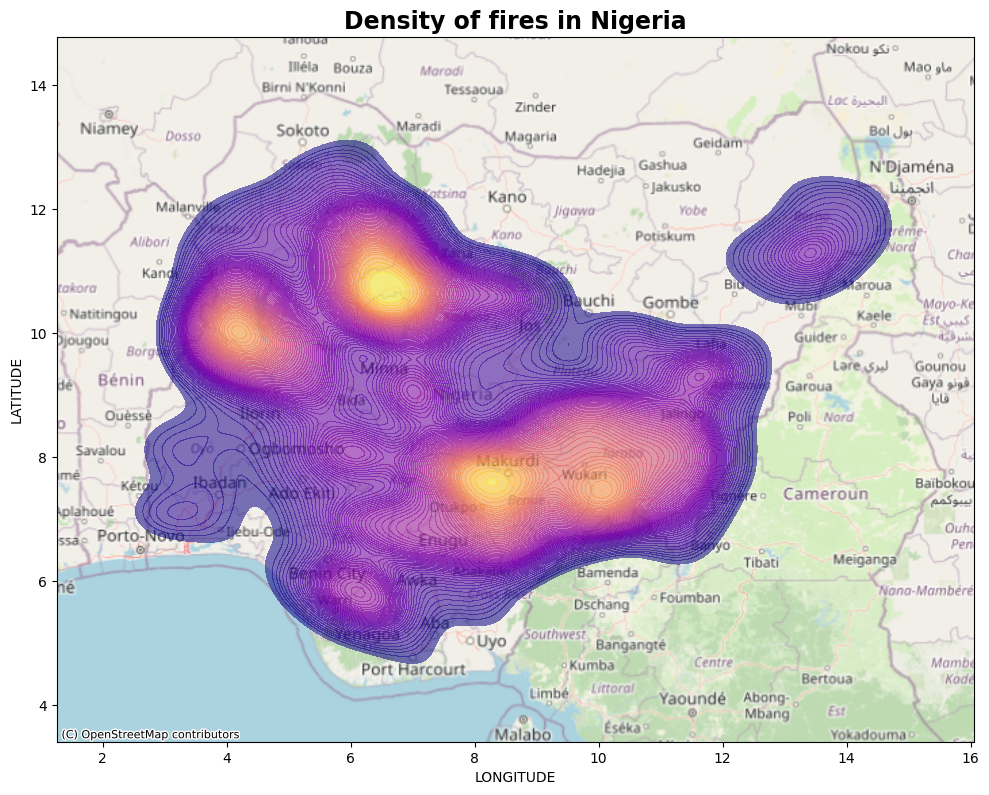

In [26]:
fig, ax=plt.subplots(figsize=(10,10))
sns.kdeplot(x=fire_geo.LONGITUDE, y=fire_geo.LATITUDE,
                n_levels=70, shade=True,
                alpha=0.55, cmap='plasma', zorder=100, ax=ax)
contextily.add_basemap(ax, crs=nigeria.crs,
    source=contextily.providers.OpenStreetMap.Mapnik)

ax.set_title(label="Density of fires in Nigeria", size=17, weight="bold")

plt.margins(0)
ax.margins(0)
plt.tight_layout() 
plt.show()

#### 1.8 Investigate if the fire detected in Nigeria are distributed rather regular/clustered(if so to identify the main cluster and explain)


As defined by Diggle (2006) Spatial Point Processes are stochastic mechanisms which generate a series of events across a region. The locations of the events generated by a point process are a point pattern. Spatial Point Processes are generally static, whereby the statistical parameters of the underlying process do not vary over space (invariant under translation), and isotropic, whereby that they exhibit the same value when measured from different directions (invariant under rotation).
Clustered Patterns are more grouped than random patterns. Visually, we can observe more points at short distances. There are two sources of clustering.
In order to test either the point pattern are clustered or regular, we have used the G function to do the test.  The 𝐺 function is defined as follows: for a given distance 𝑑, 𝐺(𝑑) is the proportion of nearest neighbor distances that are less than 𝑑.
A Simulation envelope is a computer intensive technique for inferring whether an observed pattern significantly deviates from what would be expected under a specific process. Here, we always use CSR as the benchmark. In order to construct a simulation envelope for a given function, we need to simulate CSR a lot of times, say 1000 times. Then, we can calculate the function for each simulated point pattern. For every distance 𝑑, we sort the function values of the 1000 simulated point patterns. Given a confidence level, say 95%, we can acquire the 25th and 975th value for every distance 𝑑. Thus, a simulation envelope is constructed.

In [28]:
from pointpats import PointPattern
from shapely.geometry import Point, LineString, Polygon
import pointpats.quadrat_statistics as qs
from pointpats._deprecated_distance_statistics import  K,L,G,F, Genv, Fenv, Jenv, Kenv, Lenv
from pointpats import PoissonPointProcess

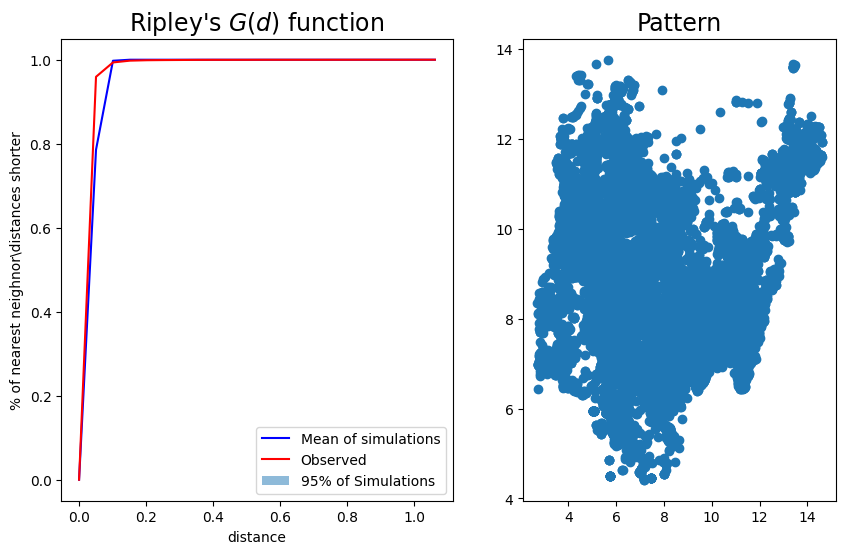

In [29]:
#Create the point pattern from the data
pp=PointPattern(fire_geo[["LONGITUDE", "LATITUDE"]])
#G function test
g_test=G(pp, intervals=60)
realizations = PoissonPointProcess(pp.window, pp.n, 100, asPP=True) # simulate CSR 100 times
genv = Genv(pp, intervals=20, realizations=realizations)  #The same for other
#The plotting
f, ax=plt.subplots(1,2, figsize=(10,6), gridspec_kw=dict(width_ratios=(10,8)))
ax[0].fill_between(genv.d, genv.low, genv.high, alpha=.5, label="95% of Simulations")
ax[0].plot(genv.d, genv.mean, color="blue", label="Mean of simulations")
ax[0].plot(*genv.observed.T, label="Observed", color="red")
ax[0].set(xlabel="distance", ylabel="% of nearest neighnor\distances shorter")
ax[0].legend()
ax[0].set_title(r"Ripley's $G(d) $ function", size=17)
ax[1].scatter(pp.df.x, pp.df.y, cmap="plasma")
ax[1].set_title("Pattern", size=17)
plt.savefig("G compa 1", format="svg")

It can be seen from the figure the G function curbe at the left figure increases rapidly at short distance. This mean that the average distance between point in the space is low. By the points are distributed clustered. By the then, the observed curbe (G function) is upon the mean of simulations.

- Identificaiton of the clusting

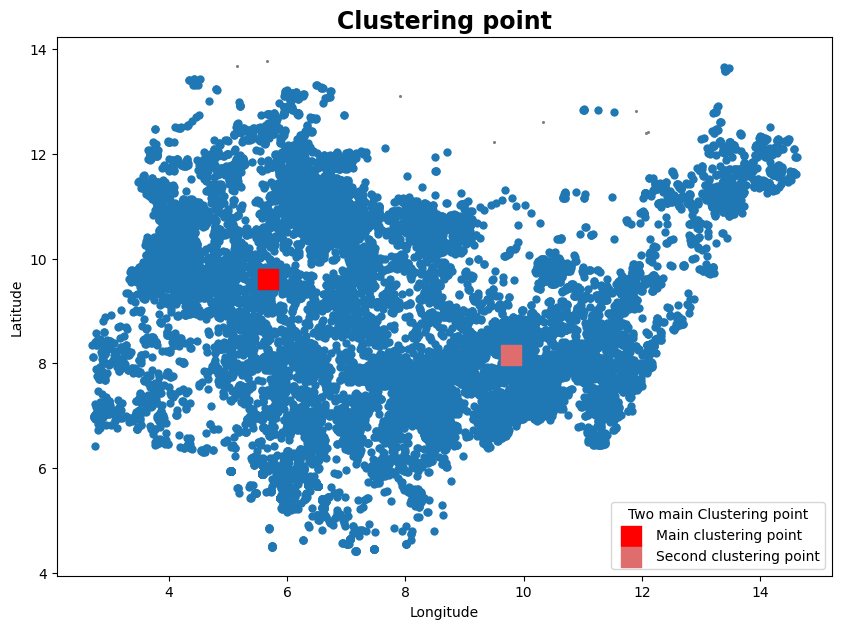

In [39]:
from sklearn.cluster import dbscan
import seaborn as sns
from sklearn.cluster import KMeans
cs, lbls = dbscan(pp.df[['x', 'y']])
lbls = pd.Series(lbls, index=pp.df.index)
#Create 2 mains clustered point from the point patttern
kmeans = KMeans(n_clusters=2).fit(pp.df)
k_value=kmeans.cluster_centers_
#PLot the point pattern with the 2 main clustered point
f, ax = plt.subplots(figsize=(10, 7))
noise = pp.df.loc[lbls==-1, ['x', 'y']]
plt.scatter(noise['x'], noise['y'], c='grey', s=5, linewidth=0)
plt.scatter(pp.df.loc[pp.df.index.difference(noise.index), 'x'], \
           pp.df.loc[pp.df.index.difference(noise.index), 'y'], \
           linewidth=0)
plt.scatter(*k_value[0], s=200, c="r", marker='s', label="Main clustering point")
plt.scatter(*k_value[1], s=200, c="#df6d6d", marker='s', label="Second clustering point")
ax.legend(title="Two main Clustering point")
ax.set_ylabel(ylabel="Latitude")
ax.set_xlabel(xlabel="Longitude")
ax.set_title(label="Clustering point", size=17, weight="bold")
plt.show()

### 1.9 Count the fires occurring in the different local government areas in Nigeria. How much are they?

The number of fire in each different local government ares in Nigeria is computed using the file new_lga_nigeria_2003.shp. The module of sjoin of the package geopandas has been used to join the two dataset by the method 

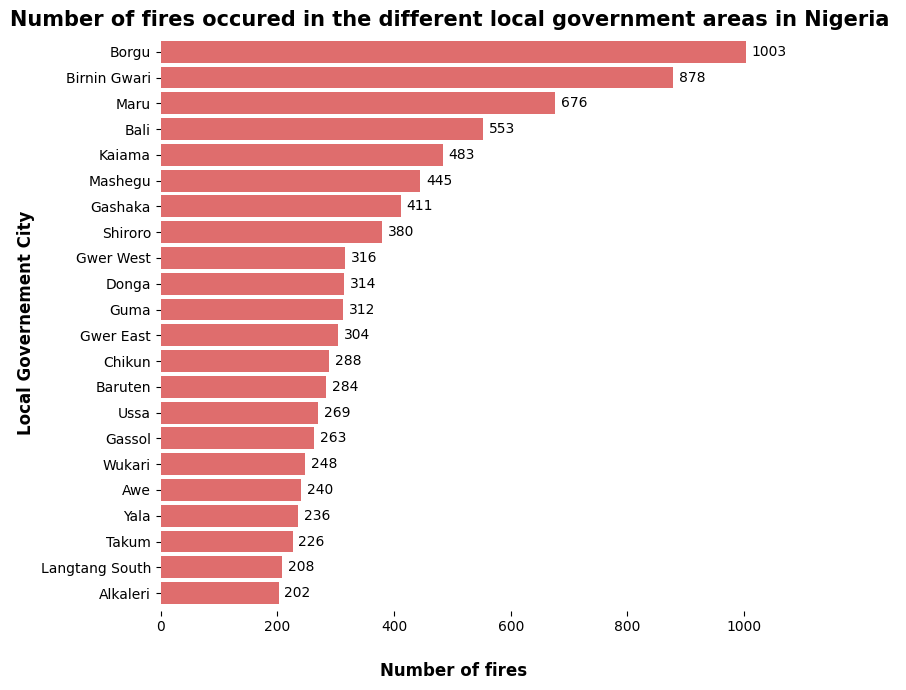

In [44]:
#Load nigeria shape file
nigeria_local = gpd.read_file('../last/SpatialAnalysis2021/Data/vector/fires/new_lga_nigeria_2003.shp')
# Do the spatial join of the fires datasets and the nigeria shape file
fire_local=gpd.sjoin(nigeria_local,fire_geo.set_crs(nigeria_local.crs))
#Create a variable containing the values of local governement area in Nigeria shape file(count)
y = fire_local['LGA'].value_counts(ascending=True)
#Select the the local governement area which has more than 200 fires to simplify the plotting
y=y[y>200]

#Plotting
ax = y.plot(kind='barh', figsize=(8, 7), color='#df6d6d', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# Set x-axis label
ax.set_xlabel("Number of fires", labelpad=20, weight='bold', size=12)
ax.set_title("Number of fires occured in the different local government areas in Nigeria ", weight='bold', size=15)
# Set y-axis label
ax.set_ylabel("Local Governement City", weight='bold', size=12)
for i, v in enumerate(y):
    ax.text(v + 10, i, str(v), color='black', fontsize=10, ha='left', va='center')
    
plt.margins(0)
ax.margins(0)
plt.tight_layout()

The number of fire in different local region in Nigeria is showed in the figure above. The local region which has the most fire is Borou couting 1003 followed by Brimin Gwari counting 878.

### 1.10.Create a map displaying the number of fires for each local government area.

In [45]:
nigeria_local.shape[0]
fire_local=gpd.sjoin(nigeria_local,fire_geo.set_crs(nigeria_local.crs))
y = fire_local['LGA'].value_counts(ascending=True)
fire_local_geom_lga= fire_local[["LGA", "geometry"]]

nb_fire_lga= y.to_frame("nfire").reset_index()
nb_fire_lga=nb_fire_lga.rename(columns={"index":"LGA"})
fire_loc_nb=fire_local_geom_lga.merge(nb_fire_lga, on="LGA")

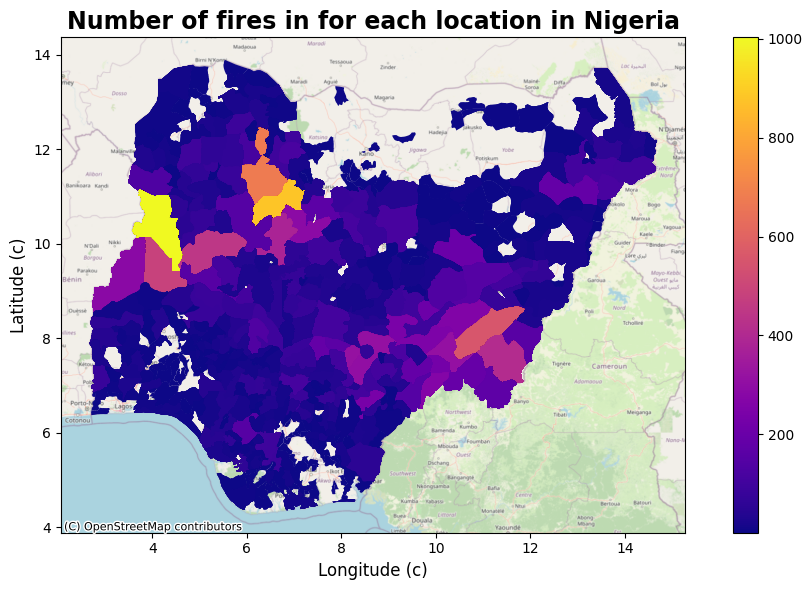

In [46]:

fig, ax=plt.subplots(figsize=(10,6))
fire_loc_nb.plot(column="nfire", legend=True, cmap="plasma",ax=ax)
ax.set_title(label="Number of fires in for each location in Nigeria", size=17, weight="bold")
ax.set_xlabel(xlabel="Longitude (c)", size=12)
ax.set_ylabel(ylabel="Latitude (c)", size=12)
contextily.add_basemap(ax, crs=nigeria.crs,
    source=contextily.providers.OpenStreetMap.Mapnik)

plt.tight_layout() 
plt.show()

The figure shows the number of fires in each location of Nigeria.  We can see the Norht West part of Nigeria has the highest value. 

### 1.11. Investigation of Spatial Correlation

The idea is to investigate whether or not spatial objects with similar values are clustered, randomly distributed or dispersed. But why is autocorrelation important? Statistics relies on observations being independent from one another. If autocorrelation exists in a time or space, then this violates the fact that observations are independent from one another. On the other hand, it also implies that there could be something interesting regarding die data distribution, which may be interesting to investigate.

In [47]:
dfsjoin = gpd.sjoin(nigeria_local,fire_geo.set_crs(nigeria_local.crs))
dfsjoin
y = dfsjoin['LGA'].value_counts(ascending=True)
lga_index = nigeria_local.set_index('LGA')
lga_count  = dfsjoin.groupby(by='LGA')[["LGA"]].count()
lga_count.rename(columns={'LGA':'nfires'},inplace=True)
lga_merge = lga_index.merge(lga_count,how='left', left_index=True, right_index=True)
lga_merge = lga_merge.fillna(0.0)


In [48]:
import libpysal as lps
from spreg import OLS
from scipy.linalg import inv
from splot.libpysal import plot_spatial_weights
import mapclassify as mc
from esda.moran import Moran, Moran_Local
from splot.esda import moran_scatterplot

In [49]:
wq=lps.weights.Queen.from_dataframe(lga_merge, geom_col="geometry")
wq.transform = 'r'
my_v=fire_loc_nb["nfire"]

#### Correlation 

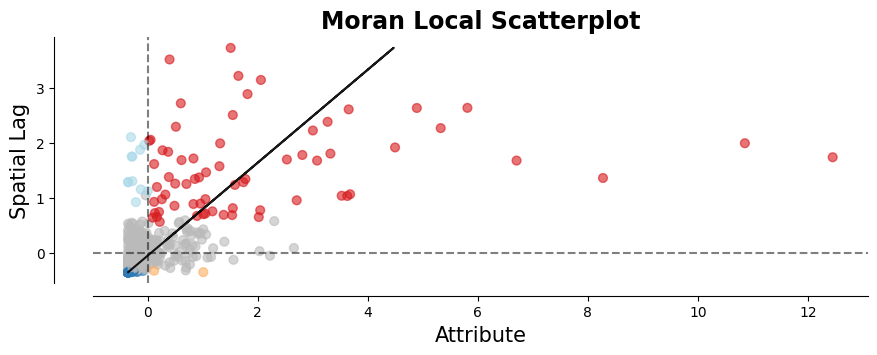

In [50]:
fig, ax=plt.subplots(figsize=(10,8))
moran_loc = Moran_Local(lga_merge.nfires, wq)
moran_scatterplot(moran_loc, p=0.05, ax=ax)
ax.set_ylabel('Spatial Lag', size=15)
ax.set_xlabel('Attribute', size=15)
ax.set_title("Moran Local Scatterplot", size=17, weight="bold")
plt.show()

These types of local spatial autocorrelation describe similarities or dissimilarities between a specific polygon with its neighboring polygons. The upper left quadrant for example indicates that polygons with low values are surrounded by polygons with high values. The lower right quadrant shows polygons with high values surrounded by neighbors with low values. This indicates an association of dissimilar values.

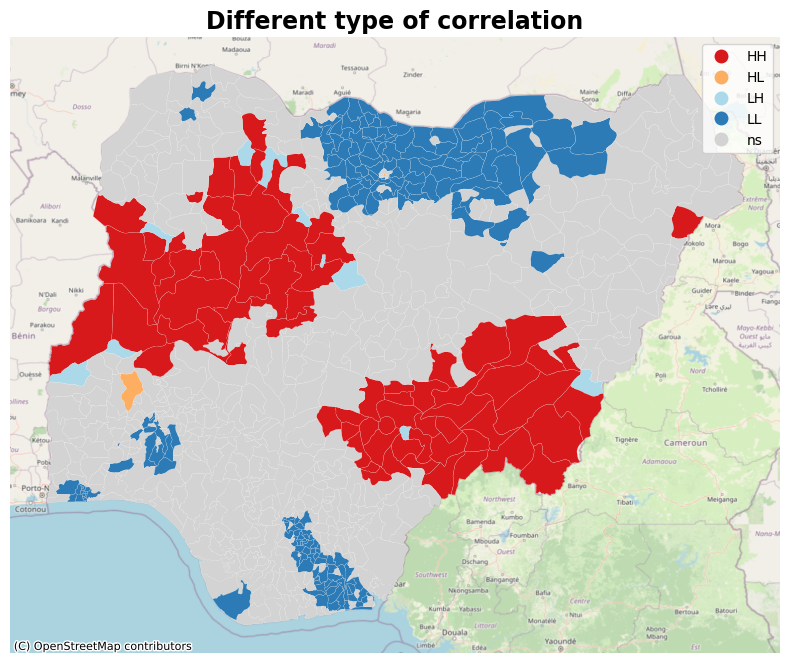

In [51]:
from splot.esda import lisa_cluster
## We can see which polygon care similar in term of the value of the variable chosen.
## High High, Low Low,...
fig, ax=plt.subplots(figsize=(12,8))
lisa_cluster(moran_loc, lga_merge, p=0.05, ax=ax)
contextily.add_basemap(ax, crs=nigeria.crs,
    source=contextily.providers.OpenStreetMap.Mapnik)

ax.set_title("Different type of correlation", size=17, weight="bold")
plt.show()

We can see from the plot 

## Exercise 2

### 2.1. Spline interpolation

The spline method works a little bit like the trend surface. You can think of a rubber disc passing through the points, which is bent while the overall curvature of the surface is minimized. It adjusts a mathematical function according to a specified number of next input points as it passes through the reference points. This method is best suited for generating smoothly changing surfaces, e.g. heights, water levels or pollutant concentrations.
The basic form of the spline method with minimal curvature imposes the following two conditions on the interpolation:
- The surface must pass exactly through the data points. 
- The surface must have minimal curvature. The total sum of the squares of the second derivative values of the surface, measured over all points of the surface, must be a minimum. 

In [17]:
import geopandas as gpd
import pandas as pd
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import verde as vd
import cartopy
import matplotlib.pyplot as plt
import rioxarray
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
from shapely.geometry import mapping
import json
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import cartopy as cp
import seaborn as sns
import xarray

In [18]:
eleve=gpd.read_file("../../SDA_Project_Files/Burkina/bfa_elevation.shp")
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
region=world[world.name=="Burkina Faso"]
mai=world[world.name=="Mali"]

eleve=eleve.to_crs("epsg:4326")

In [19]:
#mai.to_file("makan/mali.shp")
region.to_file("makan/bf.shp")

In [20]:
coordinates = (eleve.geometry.x.values, eleve.geometry.y.values)
spline = vd.Spline().fit(coordinates, eleve.SRTM30mBur)
grid_spline = spline.grid(spacing=0.02, dims=["latitude", "longitude"])
grid_spline=grid_spline.rio.write_crs(region.crs)
spline_cliped=grid_spline.rio.clip(region.geometry.apply(mapping), region.crs)

In [21]:
spline_cliped["SRTM30mBur"]=spline_cliped["scalars"]
spline_cliped=spline_cliped.drop(["scalars"])

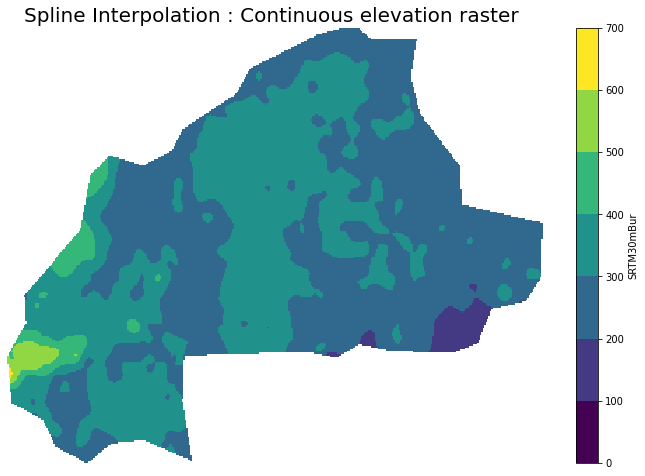

In [23]:
fig, ax=plt.subplots(figsize=(12,8))
spline_cliped.SRTM30mBur.plot(ax=ax, cmap="viridis", levels = list(range(0, 800, 100)))
ax.set_xlabel("Longitude(degree)",size=15)
ax.set_ylabel("Latitude(degree)",size=15)
plt.axis('off')
ax.set_title("Spline Interpolation : Continuous elevation raster ", size=20)
ax.tick_params(axis='both', labelsize=15 )

plt.show()

- The reason of the choice

The spline method works a little bit like the trend surface. You can think of a rubber disc passing through the points, which is bent while the overall curvature of the surface is minimized.

In addition, the accuracy of the output of the spline mehtod is also very important. Let's the R2 function.

In [5]:
train, test = vd.train_test_split(
    coordinates, eleve.SRTM30mBur, test_size=0.2, random_state=0,
)

spline = vd.Spline().fit(*train)

test_values = np.array(list(test[1]))
prediction = spline.predict(test[0])

df = pd.DataFrame({'obs':test_values[0], 'pred':prediction})
correlation_matrix = np.corrcoef(test_values[0], prediction)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2


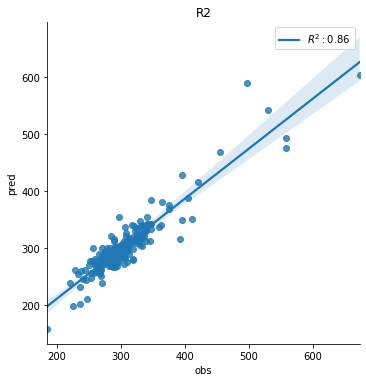

In [6]:
p = sns.lmplot(x='obs',y='pred',data=df,
        line_kws={'label':"Linear Reg"}, legend=True)

ax = p.axes[0, 0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
label_line_2 = r'$R^2:{0:.2f}$'.format(r_squared) 
L_labels[0].set_text(label_line_2)
ax.set_title("R2")
plt.savefig("raster/r2", format="svg")
plt.show()

We can seee the value of R2 is 0.86. This means the output is accurate at 86%. 

### 2.2. Show maps for both rasters and compare your created continuous elevation raster with the SRTM Digital Elevation Model for Burkina Faso. What do you observe? Where are the differences?

Populating the interactive namespace from numpy and matplotlib


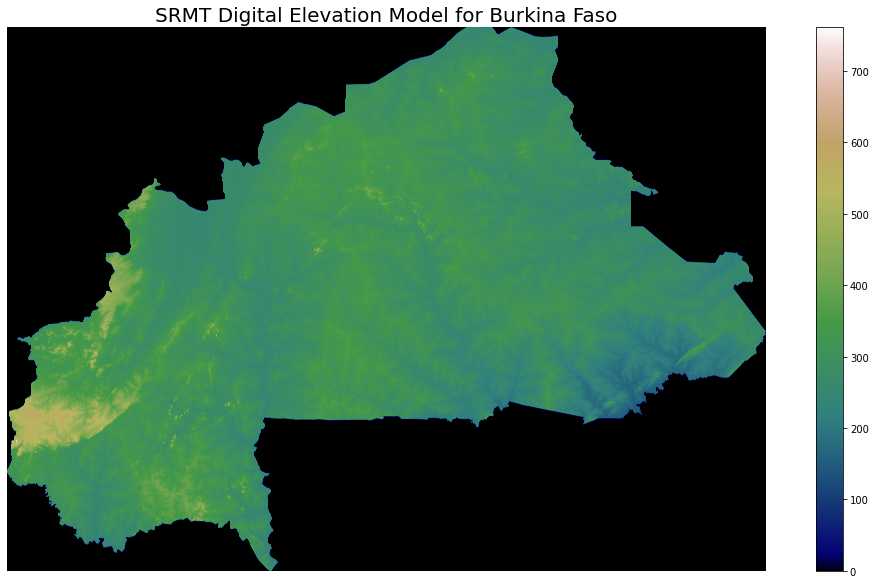

In [16]:
my_raster=rasterio.open("../../SDA_Project_Files/Burkina/bfa_srtm.tif")
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 10)
plt.imshow(my_raster.read(1),cmap="viridis" ) 
cbar = plt.colorbar()
plt.set_cmap('gist_earth')
plt.axis('off')
plt.title("SRMT Digital Elevation Model for Burkina Faso", size=20)
plt.show()

We can see from the two plots that the values are similar. But even they are similar, we can notice some  differences between the rasters object. 